# Logistic Regression

In this notebook, we will implement Logistic Regression using Gradient Descent.<br/>
Logistic regression is named so because of the function used at the core of the method, the logistic (Sigmoid) function.<br/>
It is generally used used for **classification purposes**, i.e the dependent variable takes limited no of values (2 in this case) only.<br/>

The basic intuition behind Logistic regression is that it tries to create a **hyperplane** which seperates the different classes (our ouput dependent variable).

As shown in the image below, the green dots (y = 0) and Red Dots (y = 1) are seperated by hyperplane (line in our case).

<img src = 'images/LogReg.png' style = 'width:420px;height:400px;'>

<br/>
The following image reprsents the common structure and difference between Linear and Logistic regression. In Logistic regression the output of the Linear regression is passed through a **sigmoid** activation function.

<img src = 'images/LogisticVsLinear.png'>

# Steps to solve a Logistic Regression problem

1. Initialize the parameters (W (weights) and b (biases)).
2. Implement the forward and backward propagation for learning the parameters.
3. Update the parameters using Gradient Descent.
4. Combine the above steps to form a model.

In [1]:
# import the required libraries
import numpy as np
import matplotlib.pyplot as plt

## The sigmoid activation function

The sigmoid function is given by -
$$ g(z) = \frac{1}{(1 + e^{-z})} $$

<img src = 'images/sigmoid.png' style = 'width:500px;height:300px;'>

In [2]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

## Initialize the paramaters
Initialize the weights and biases to 0.

In [3]:
def initializeParams(dim):
    w = np.zeros((dim, 1))
    b = 0
    return w, b

## Forward propagation

As  we will have one independent variable (X), therfore our hypothesis function will be:
$$ h(x) = sigmoid(W.X + b) $$
Therefore, 0 <= h(x) <= 1

In [4]:
def forwardProp(w, b, X):
    Z = np.dot(w.T, X) + b
    A = sigmoid(Z)
    return A

## Cost function
$$ Cost =  -log(h(x)\text{, if y = 1; } -log(1 - h(x))\text{, if y = 0} $$
Therefore,
$$ J = -\frac{1}{m}\sum [Y*log(A) + (1 - Y)*log(1 - A)] $$

In [5]:
def cost(A, Y):
    m = A.shape[1]
    return (-1/m * (np.dot(Y, np.log(A).T) + np.dot((1 - Y), np.log(1 - A).T))).item()

## Backward propagation
$$ \frac{dJ}{dA} = \frac{A - Y}{m*A(1 - A)} $$
<br/>
$$ \frac{dA}{dZ} = \frac{e^{-z}}{(1 + e^{-z})^2} $$
<br/>
$$ \frac{dZ}{dW} = X \text{ , } \frac{dZ}{db} = 1 $$
Therefore,
$$ \frac{dJ}{dW} = \frac{1}{m}X.(A - Y) \text{ , }\frac{dJ}{db} = \frac{1}{m}\sum(A - Y) $$

In [6]:
def backProp(X, A, Y):
    m = A.shape[1]
    dw = 1/m * np.dot(X, (A - Y).T)
    db = 1/m * np.sum(A - Y)
    return dw, db

## Update Parameters
Update the parameters using Gradient Descent.

In [7]:
def updateParams(w, b, dw, db, alpha):
    w = w - alpha * dw
    b = b - alpha * db
    return w, b

Combine all the steps and functions to form a model.

In [8]:
def model(X, Y, max_iters = 1000, alpha = 0.15):
    w, b = initializeParams(X.shape[0])
    
    for iters in range(max_iters):
        A = forwardProp(w, b, X)
        
        c = cost(A, Y)
        
        (dw, db) = backProp(X, A, Y)
        
        (w, b) = updateParams(w, b, dw, db, alpha)
        
        if iters % 20 == 0:
            print('Iteration {} \nCurrent cost: '.format(iters), round(c, 3))
    
    params = {'w': w, 'b': b}
    
    return params

## Predict the output for given parameters and input
For the values of A > 0.5 the ouput will be 1 and for values of A <= 0.5 the output will be 0.

In [9]:
def predict(params, X):
    
    m = X.shape[1]
    Y_prediction = np.zeros((1,m))
    
    A = forwardProp(params['w'], params['b'], X)
    
    for i in range(A.shape[1]):
        if A[0, i] > 0.5:
            Y_prediction[0, i] = 1
        else:
            Y_prediction[0, i] = 0
    
    return Y_prediction

## Generate Data for testing

In [10]:
x = np.random.rand(2, 1000)
y = x[1, :] > x[0, :]

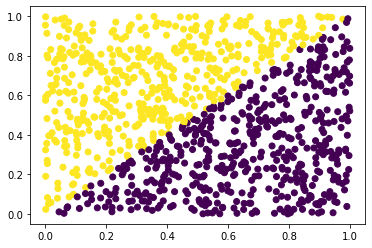

In [11]:
plt.scatter(x[0, :], x[1, :], c = y);

In [12]:
# Use the model to generate the appropriate paremeters
params = model(x, y, 1000)

Iteration 0 
Current cost:  0.693
Iteration 20 
Current cost:  0.655
Iteration 40 
Current cost:  0.621
Iteration 60 
Current cost:  0.591
Iteration 80 
Current cost:  0.565
Iteration 100 
Current cost:  0.541
Iteration 120 
Current cost:  0.52
Iteration 140 
Current cost:  0.501
Iteration 160 
Current cost:  0.484
Iteration 180 
Current cost:  0.468
Iteration 200 
Current cost:  0.454
Iteration 220 
Current cost:  0.441
Iteration 240 
Current cost:  0.429
Iteration 260 
Current cost:  0.418
Iteration 280 
Current cost:  0.408
Iteration 300 
Current cost:  0.399
Iteration 320 
Current cost:  0.39
Iteration 340 
Current cost:  0.382
Iteration 360 
Current cost:  0.375
Iteration 380 
Current cost:  0.368
Iteration 400 
Current cost:  0.361
Iteration 420 
Current cost:  0.355
Iteration 440 
Current cost:  0.349
Iteration 460 
Current cost:  0.343
Iteration 480 
Current cost:  0.338
Iteration 500 
Current cost:  0.333
Iteration 520 
Current cost:  0.328
Iteration 540 
Current cost:  0.323


### Generate the predicted output for the input

In [13]:
Y_pred = predict(params, x)

In [14]:
print("Accuracy: {} %".format(100 - np.mean(np.abs(Y_pred - y)) * 100))

Accuracy: 98.3 %
